In [1]:
%load_ext autoreload
%autoreload 2

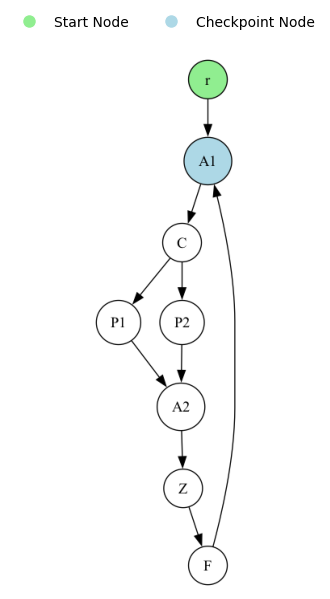

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from example_systems.example_nontrivial_system import ExampleSim
from tests.contractionTests.contraction_test import get_factor_from_list
ExampleSim().plot.render_graph()

In [3]:
sim = ExampleSim(reference_signal=20.0, weights="./weights/weights_basic_ReLU.pth")
# sim = ExampleReLUSim(reference_signal=-50.0, weights="./weights/weights_trained.pth")
sim.system.run(iterations=200)

Running Control System: 201it [00:00, 7138.73it/s]             


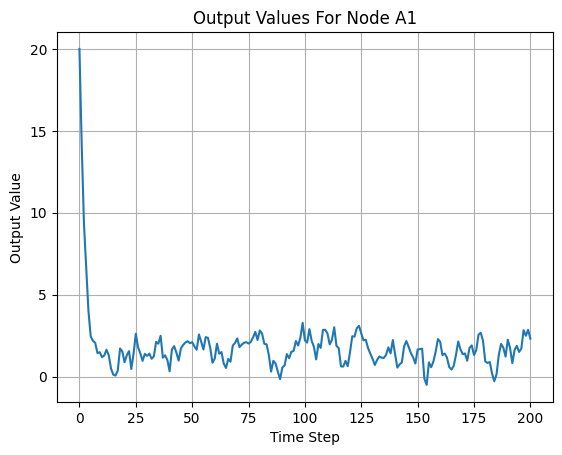

In [4]:
sim.plot.node_outputs("A1")

## Agent response probabilities are sigmoids
In this example, agent logic is defined in the way that probability of choosing function 1 as a response is
`P(f1|w) = sigmoid(a * (w + b))`, (exact plots for current setting are below) where w is some variable (in this example it's a random variable from the normal distribution) and we may not be aware of w's nature

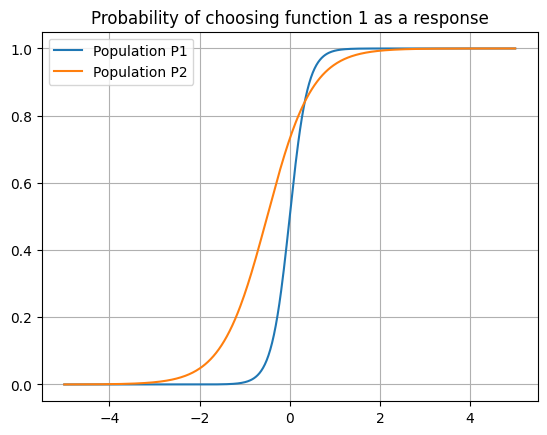

In [5]:
# Agent Logic for P1: a = 5;b = 0
# Agent Logic for P2: a = 2;b = 0.5
def a_sigmoid(x, a, b):
    return torch.sigmoid(a * (x + b))

x = torch.linspace(-5, 5, steps=500)
y1 = a_sigmoid(x, 5, 0)
y2 = a_sigmoid(x, 2, 0.5)
plt.plot(x, y1, label="Population P1")
plt.plot(x, y2, label="Population P2")
plt.grid(True)
plt.legend()
plt.title("Probability of choosing function 1 as a response");

## Estimate agents' response probabilities

In [6]:
estimated_probs = sim.system.estimate_probabilities(p_num=2)
estimated_probs

[array([0.49125, 0.50875]), array([0.64425, 0.35575])]

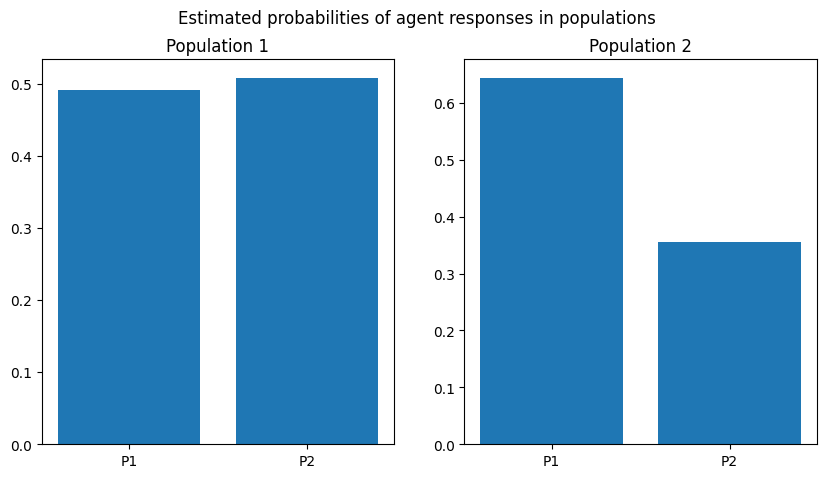

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax.flatten()
ii = 0
for prob in estimated_probs:
    ax[ii].set_title(f"Population {ii+1}")
    ax[ii].bar(['P1', 'P2'], prob)
    ii += 1
plt.suptitle("Estimated probabilities of agent responses in populations");

In [8]:
estimated_probs

[array([0.49125, 0.50875]), array([0.64425, 0.35575])]

In [9]:
eps = 0.05
reference_signals = np.array([20])

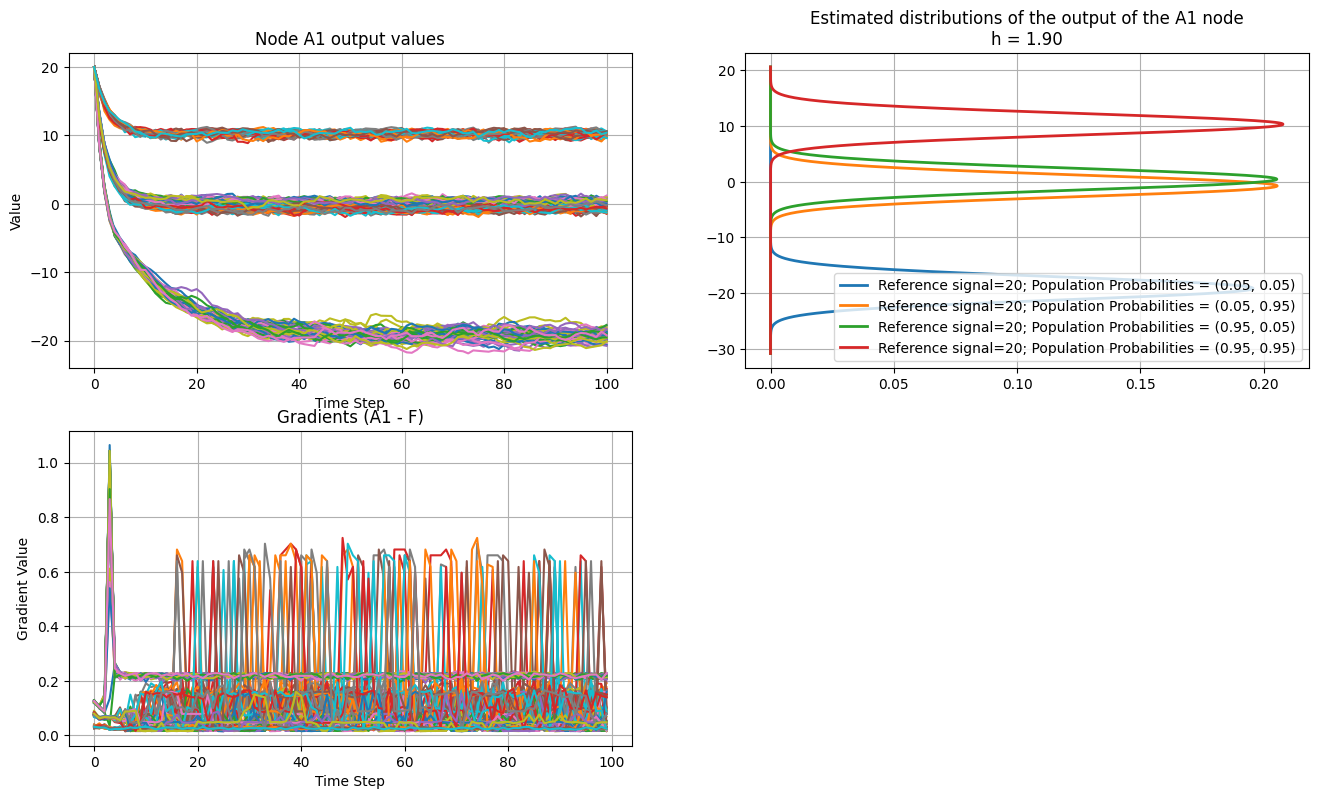

Approximated C factor value for reference signal = 20 is equal to [0.2218546  0.14049429 0.04872383 0.02528369]


In [10]:
C = get_factor_from_list(reference_signals=reference_signals, agent_probs=np.array([[eps, 1.0-eps], [eps, 1.0-eps]]), sim_class=ExampleSim, it=100, trials=40, weights="./weights/weights_basic_ReLU.pth", node_outputs_plot="A1", show_distributions_plot=True, show_distributions_histograms_plot=False)
for i in range(len(reference_signals)):
    print(f"Approximated C factor value for reference signal = {reference_signals[i]} is equal to {C[i]}")

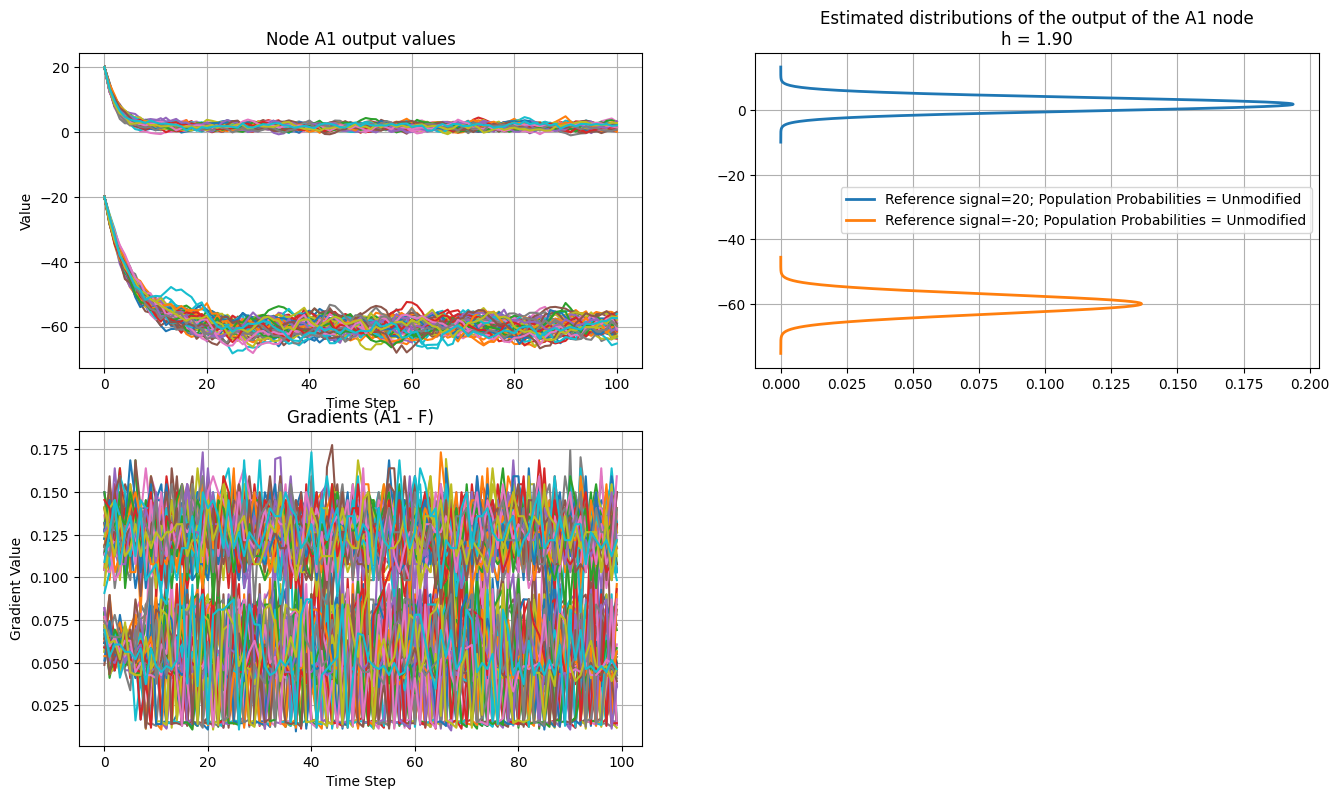

Approximated C factor value for reference signal = 20 is equal to [0.05458948]
Approximated C factor value for reference signal = -20 is equal to [0.1260495]


In [14]:
reference_signals = np.array([20, -20])
C = get_factor_from_list(reference_signals=reference_signals, agent_probs=None, sim_class=ExampleSim, it=100, trials=50, weights="./weights/weights_basic_ReLU.pth", node_outputs_plot="A1", show_distributions_plot=True, show_distributions_histograms_plot=False)
for i in range(len(reference_signals)):
    print(f"Approximated C factor value for reference signal = {reference_signals[i]} is equal to {C[i]}")